# DAE with absolute value function in constraints

The system simulated in this example is:

$$  \left\{
        \begin{align}
            \dot{x}_1(t) =&~ 1 + B_0z(t)   \\
            \dot{x}_2(t) =&~ B_1z(t) \\
            0 =&~ |x_1(t)| - x_2(t) 
        \end{align}
    \right. $$
    
In code $B_0 = 0$ and $B_1 = 1$    
In this particular Jupyter File we consider the LCP representation of the absolute value function with an LCP.
Let first note that either $|x| = -x$ when $x\leq 0$, or $|x| = x$ when $x\geq0$, with equality iff $x = 0$. This is equivalent to write the complentary problem:

$$ 0\leq |x|-x \perp |x|+x\geq0 $$

noting $\lambda = |x_1|- x_1 $ we finally obtain the system:

$$  \left\{
        \begin{align}
            \dot{x}_1(t) =&~ 1 + B_0z(t)   \\
            \dot{x}_2(t) =&~ B_1z(t) \\
            0 =&~ \lambda  +x_1 - x_2(t) \\
            0\leq&~\lambda+2x_1 \perp \lambda \geq 0
        \end{align}
    \right. $$
    
Note that different values of $(B_0,B_1)$ and of the initial conditions yield simulated results with jumps even if continuous solutions exists !    

A = 
[[ 0.   0.  -1. ]
 [ 0.   0.   0.5]
 [ 1.  -1.   0. ]]
b = 
[1, 0, 1]
E = 
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
R = 
[[ 0.]
 [ 0.]
 [ 1.]]
C = 
[[ 2.  0.  0.]]
D = 
[[ 1.]]
Number of iterations =  1001


<IPython.core.display.Javascript object>


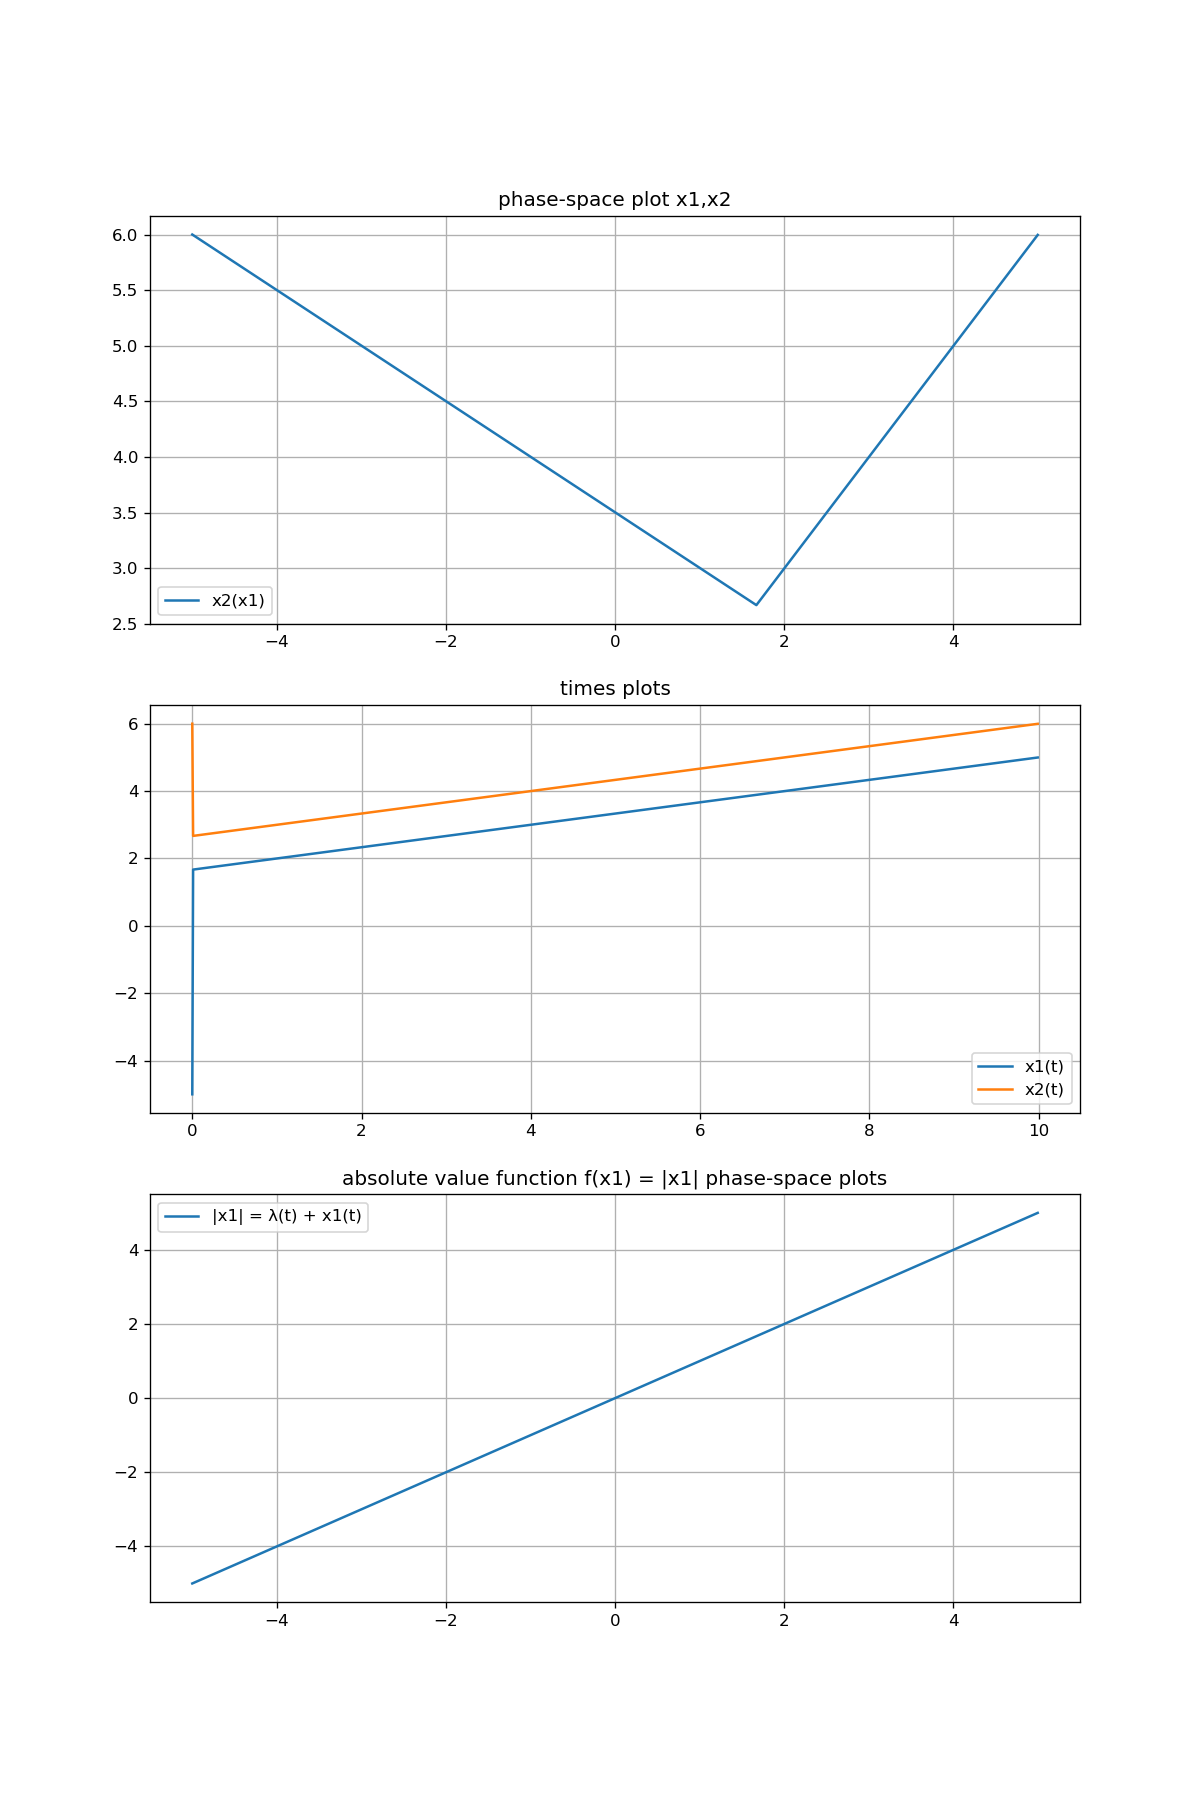

<IPython.core.display.Javascript object>


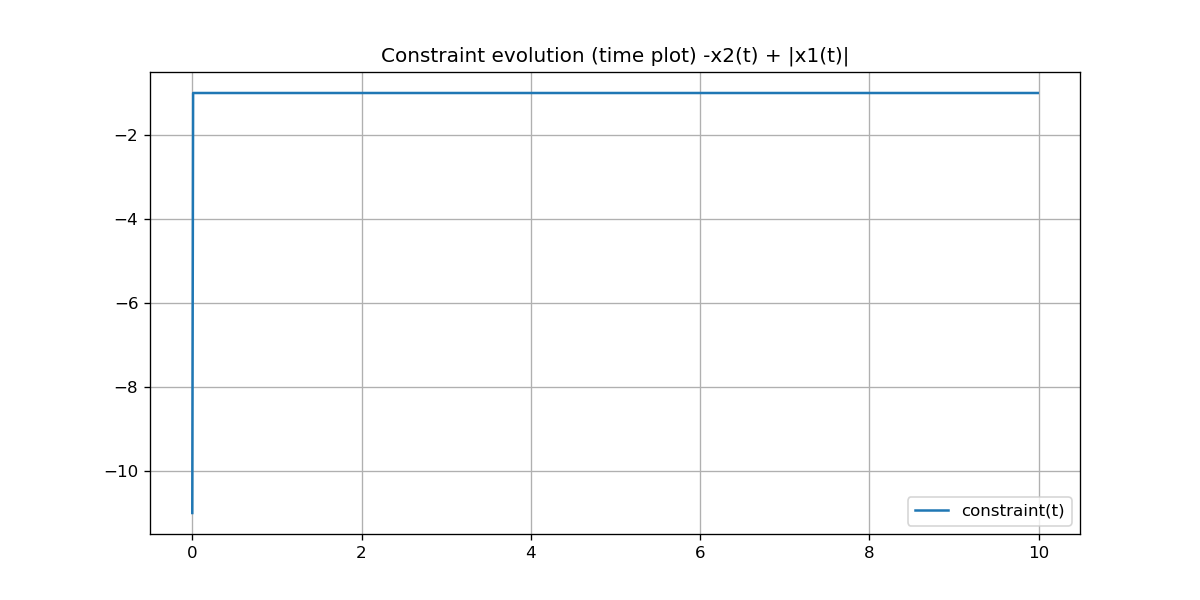

<IPython.core.display.Javascript object>


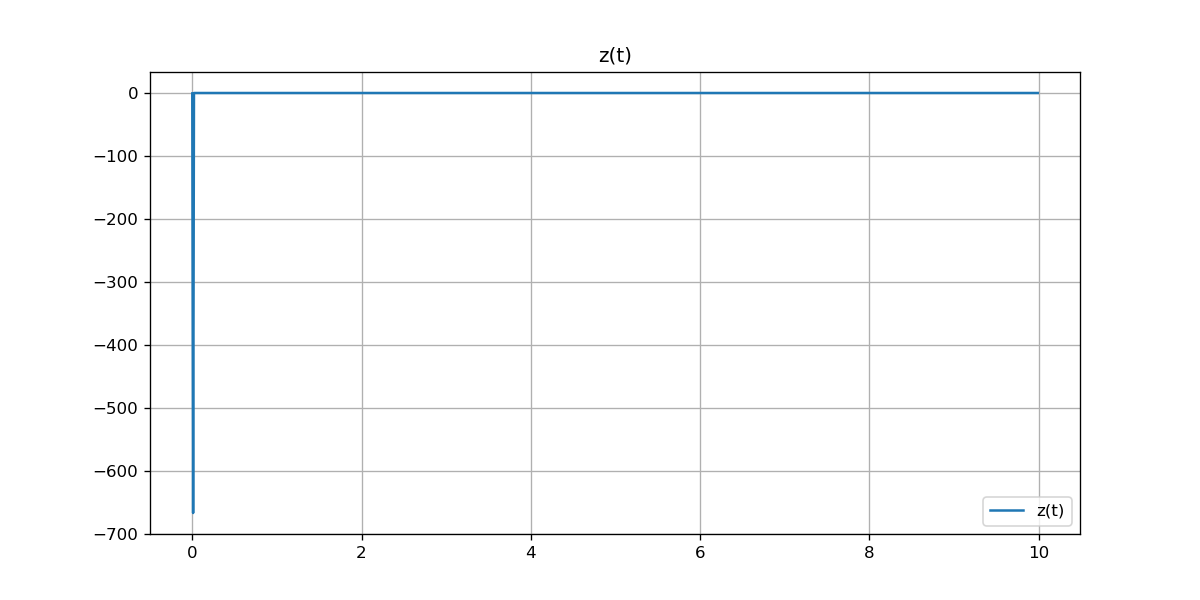

<IPython.core.display.Javascript object>


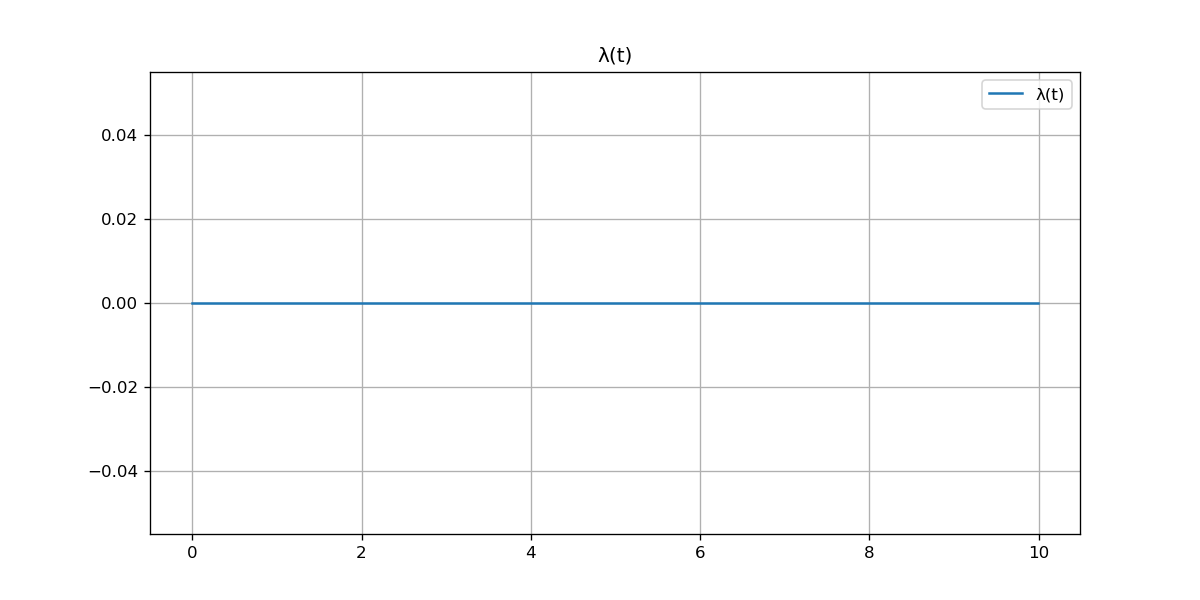

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [2]:
import siconos.numerics as sn
import scipy.linalg as linalg
import numpy as np
import siconos.kernel as sk
from numpy import eye, empty, float64, zeros, transpose, array
from siconos.kernel import FirstOrderLinearTIDS, FirstOrderType2R, FirstOrderLinearTIR, EqualityConditionNSL, RelayNSL,\
                           ComplementarityConditionNSL, NonSmoothDynamicalSystem, Interaction, \
                           EulerMoreauOSI, MoreauJeanOSI, LCP, TimeDiscretisation, TimeStepping 
import siconos.numerics as sn

z0    = 0 

x10   = -5      
x20   = 6 

t0    = 0.      # start time
T     = 10.0      # end time with : 1.6 for start of the pb

time_step = 0.01 #0.001 # 0.012 

# _B = [0,1]     # sliding
_B = [-1,0.5]  #jumping (could stay on the constraint also ...)

_A = zeros((3,3))
_A[0,2] = _B[0]
_A[1,2] = _B[1]
_A[2,0] = 1
_A[2,1] = -1

_b = [1,0,1]

print("A = ")
print(_A)

print("b = ")
print(_b)

_E = np.eye(3)
_E[2,2] = 0
print("E = ")
print(_E)


# Linear ODE system with time invariant coefficients
dyn = FirstOrderLinearTIDS([x10,x20,z0],_A)
dyn.setbPtr(_b)
dyn.setMPtr(_E)

switch = NonSmoothDynamicalSystem(t0, T)
switch.insertDynamicalSystem(dyn)

####################################################

#
R= zeros((3,1));
R[2,0] = 1
print("R = ")
print(R)

C = zeros((1,3)); 
C[0,0] = 2;
print("C = ")
print(C)

D = zeros((1,1)); 
D[0,0] = 1;
print("D = ")
print(D)

e = [0]# constant parts in LCP left hand sides

# Declaration of the left hand side of the LCP in the form
# C1*x + D1*λ + e1
# Using the matrices previously defined
# R1 is built the such that dx/dt = A*x + R1*λ + b
rel_python_1 = sk.FirstOrderLinearTIR(C, R)
rel_python_1.setDPtr(D)
rel_python_1.setePtr(e)

# Declaration that right side is an LCP
nslaw1 = ComplementarityConditionNSL(1)

# Link between left hand side et right hand side of the LCP
# 0=< C1*x + D1*λ + e1 _|_ λ>= 0
interaction_1 = Interaction(nslaw1, rel_python_1)

switch.link(interaction_1, dyn)

# Discretization and non-smooth problem formulation (LCP)
θ = 1.
γ = 1.
#osi = EulerMoreauOSI(θ)  # One Step time Integrator for First Order Dynamical Systems.
# Simple theta method (~backward euler)
osi = EulerMoreauOSI(θ,γ)  # One Step time Integrator for First Order Dynamical Systems.

osnspb = sk.LCP()


# Simulation and time discretisation
td = TimeDiscretisation(t0, time_step)
simu = TimeStepping(switch, td, osi, osnspb)

##########################################################################
## !!! ALWAYS DECLARE COMPUTE RESIDUY and R for NonLinear Relations !!!!
##         OTHERWISE NEWTOWN ALG DO NOT USE JACOBIANS 
#########################################################################
# simu.setComputeResiduY(True)
# simu.setComputeResiduR(True)
# simu.setNewtonMaxIteration(100) #100 more funcky
# simu.setNewtonTolerance(1e-10)
##########################################################################

##### Simulation run
x = dyn.x() # tracking state variables form ODE
λ = interaction_1.lambda_(0) # tracking λ variables form LCP
k = 0

##### Numpy array used to save data at each time step, for post-processing
N = int((T - t0) / simu.timeStep()) + 1
data_plot = zeros((N, 6))

###### Initial state
data_plot[k, 0] = t0
data_plot[k, 1] = x[0] # x1
data_plot[k, 2] = x[1] # x2
data_plot[k, 3] = x[2] # z
data_plot[k, 4] = λ[0] # |x1|-x
k += 1

while simu.hasNextEvent():
    
    simu.computeOneStep() # Build and solve the LCP    
#     osnspb.display()
    data_plot[k, 0] = simu.nextTime()
    data_plot[k, 1] = x[0] # x1
    data_plot[k, 2] = x[1] # x2
    data_plot[k, 3] = x[2] # z
    data_plot[k, 4] = λ[0] # |x1|-x
    k += 1 
    #rel_python.display()
    simu.nextStep() # Save current state and prepare next step

print("Number of iterations = ",k)

import ipympl
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(figsize=(10,15))
plt.subplot(311)
plt.title('phase-space plot x1,x2')
plt.plot(data_plot[0:k - 1, 1], data_plot[0:k - 1, 2],label='x2(x1)')
plt.legend()
plt.grid()
plt.subplot(312)
plt.title('times plots')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 1],label='x1(t)')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 2],label='x2(t)')
plt.legend()
plt.grid()
plt.subplot(313)
plt.title('absolute value function f(x1) = |x1| phase-space plots')
plt.plot(data_plot[0:k - 1, 1], data_plot[0:k - 1, 1] + data_plot[0:k - 1, 4],label='|x1| = λ(t) + x1(t)')
plt.legend()
plt.grid()

constraint = -data_plot[0:k - 1, 2] + data_plot[0:k - 1, 1] + data_plot[0:k - 1, 4] 
plt.figure(figsize=(10,5))
plt.title('Constraint evolution (time plot) -x2(t) + |x1(t)|')
plt.plot(data_plot[0:k - 1, 0], constraint,label='constraint(t)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.title('z(t)')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 3],label='z(t)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.title('λ(t)')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 4],label='λ(t)')
plt.legend()
plt.grid()
plt.show()


print(data_plot[0:k - 1, 4])